In [1]:
pip install boto3 scikit-learn

     |████████████████████████████████| 8.7 MB 2.8 MB/s eta 0:00:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.23.24
    Uninstalling botocore-1.23.24:
      Successfully uninstalled botocore-1.23.24
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.1.2 requires botocore<1.23.25,>=1.23.24, but you have botocore 1.24.46 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install s3fs

  Using cached botocore-1.23.24-py3-none-any.whl (8.4 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.24.46
    Uninstalling botocore-1.24.46:
      Successfully uninstalled botocore-1.24.46
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.21.28 requires botocore<1.25.0,>=1.24.28, but you have botocore 1.23.24 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip3 install pandas numpy seaborn matplotlib 


In [5]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imblearn

     |████████████████████████████████| 199 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 11.0 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Libraries
import boto3
# pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# Importing Data

In [8]:
client = boto3.client('s3')

In [9]:
path2 = 's3://handm1/customers.csv' 
path3 = 's3://handm1/transactions_train.csv'

In [3]:
customers = pd.read_csv('customers.csv')
transaction = pd.read_csv('transactions_train.csv')

In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


customers.columns

In [5]:
customers.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [6]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [7]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [8]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [9]:
transaction.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

# Left Join for transaction and customer tables

In [10]:
result = pd.merge(transaction,customers,how="left", on=["customer_id","customer_id"])

In [11]:
result.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [12]:
result.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code'],
      dtype='object')

In [13]:
## Removing Unnecessary features
# Here article_id is removed because our goal is to findout if the person is going to buy a product in 90 days 
# or not. Article id is not needed for it.

In [14]:
result = result.drop(['article_id'],axis=1)

# Data Preprocessing
- Missing Values
- Cardinality
- Minumum value
- Maximum value
- DataTypes
- Handling Missing Value
- Handling DataType
- Outliers

## Missing Values

In [15]:
result.isna().sum()

t_dat                            0
customer_id                      0
price                            0
sales_channel_id                 0
FN                        18209837
Active                    18412468
club_member_status           62165
fashion_news_frequency      141711
age                         140258
postal_code                      0
dtype: int64

In [16]:
missing_values = pd.DataFrame(result.isna().sum(),columns=['Missing_Values'])

In [17]:
result.isna().sum() * 100/len(result)

t_dat                      0.000000
customer_id                0.000000
price                      0.000000
sales_channel_id           0.000000
FN                        57.284672
Active                    57.922110
club_member_status         0.195559
fashion_news_frequency     0.445796
age                        0.441225
postal_code                0.000000
dtype: float64

In [18]:
# Cardinality
# Here we have 2 years data which is approx of 734.
# Customer_id, article_id, price, and age unique values looks reasonable.  
#Sales_channel_id, club_members, and fashnion news frequency are also having reable unique values

In [19]:
result.nunique()

t_dat                         734
customer_id               1362281
price                        9857
sales_channel_id                2
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352336
dtype: int64

In [20]:
Cardinality = pd.DataFrame(result.nunique(),columns=['Cardinality'])

In [21]:
#Count

In [22]:
result.count()

t_dat                     31788324
customer_id               31788324
price                     31788324
sales_channel_id          31788324
FN                        13578487
Active                    13375856
club_member_status        31726159
fashion_news_frequency    31646613
age                       31648066
postal_code               31788324
dtype: int64

In [23]:
count = pd.DataFrame(result.count(),columns=['count'])

In [24]:
# Maximum and minimum values

In [25]:
result.describe()

,price,sales_channel_id,FN,Active,age
count,3.178832e+07,3.178832e+07,13578487.0,13375856.0,3.164807e+07
mean,2.782927e-02,1.704028e+00,1.0,1.0,3.603827e+01
std,1.918113e-02,4.564786e-01,0.0,0.0,1.298003e+01
min,1.694915e-05,1.000000e+00,1.0,1.0,1.600000e+01
25%,1.581356e-02,1.000000e+00,1.0,1.0,2.500000e+01
50%,2.540678e-02,2.000000e+00,1.0,1.0,3.100000e+01
75%,3.388136e-02,2.000000e+00,1.0,1.0,4.700000e+01
max,5.915254e-01,2.000000e+00,1.0,1.0,9.900000e+01


In [26]:
# Data types

In [27]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   t_dat                   object 
 1   customer_id             object 
 2   price                   float64
 3   sales_channel_id        int64  
 4   FN                      float64
 5   Active                  float64
 6   club_member_status      object 
 7   fashion_news_frequency  object 
 8   age                     float64
 9   postal_code             object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.6+ GB


In [28]:
data_types = pd.DataFrame(result.dtypes,columns=['Data_Types'])

In [29]:
#Mode

In [30]:
mode = pd.DataFrame(result[['sales_channel_id','club_member_status','fashion_news_frequency']].value_counts().idxmax(),columns=['Mode'])

In [31]:
mode

,Mode
0,2
1,ACTIVE
2,NONE


In [32]:
#Data quality report

In [33]:
data_quality_reportt = data_types.join(missing_values).join(Cardinality).join(count)
data_quality_reportt

,Data_Types,Missing_Values,Cardinality,count
t_dat,object,0,734,31788324
customer_id,object,0,1362281,31788324
price,float64,0,9857,31788324
sales_channel_id,int64,0,2,31788324
FN,float64,18209837,1,13578487
Active,float64,18412468,1,13375856
club_member_status,object,62165,3,31726159
fashion_news_frequency,object,141711,4,31646613
age,float64,140258,84,31648066
postal_code,object,0,352336,31788324


In [189]:
data_quality_reportt = data_types.join(missing_values).join(Cardinality).join(count)
data_quality_reportt

,Data_Types,Missing_Values,Cardinality,count
t_dat,object,0,734,31788324
customer_id,object,0,1362281,31788324
price,float64,0,9857,31788324
sales_channel_id,int64,0,2,31788324
FN,float64,18209837,1,13578487
Active,float64,18412468,1,13375856
club_member_status,object,62165,3,31726159
fashion_news_frequency,object,141711,4,31646613
age,float64,140258,84,31648066
postal_code,object,0,352336,31788324


In [34]:
## Data Quality Plan

In [35]:
data_Quality_Plan = pd.DataFrame({'Feature':['Missing','Missing','Missing','DataType'],'Data Quality Issue':['More than 67% missing','23% Missing values','23% numerical missing values','Data type for date is object'],'Potential Handling Strategies':['remove because the missing values are more than 50%','Impute it with None','Impute it with Median','Convert the data type to time_date']})

In [36]:
data_Quality_Plan

,Feature,Data Quality Issue,Potential Handling Strategies
0,Missing,More than 67% missing,remove because the missing values are more tha...
1,Missing,23% Missing values,Impute it with None
2,Missing,23% numerical missing values,Impute it with Median
3,DataType,Data type for date is object,Convert the data type to time_date


## Handling

In [37]:
# Handling Missing Values

In [38]:
# Here both FN and Active are having more than 60%, so removing the columns is the best option.

#Clubmember status and fashion news frequency are filled with None. (their missing values are less than 50%)

In [39]:
result = result.drop(['FN','Active'],axis=1)

In [40]:
result.fillna({"club_member_status":'No','fashion_news_frequency':'None'},inplace=True)

In [41]:
result.isna().sum()

t_dat                          0
customer_id                    0
price                          0
sales_channel_id               0
club_member_status             0
fashion_news_frequency         0
age                       140258
postal_code                    0
dtype: int64

In [42]:
#Age has 23% of missing value, so we are imputing the missing value with median.

In [43]:
result = result.fillna({'age': result['age'].median()})

In [190]:
result.isna().sum()

t_dat                     0
customer_id               0
price                     0
sales_channel_id          0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [44]:
#Handling Datatypes

In [45]:
# Handling Data Types
# t_dat is representing date column, but the datatype is object.
# So, converted into datetime datatype 

In [46]:
result['t_dat'] = pd.to_datetime(result['t_dat'],format='%Y-%m-%d')

In [47]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   t_dat                   datetime64[ns]
 1   customer_id             object        
 2   price                   float64       
 3   sales_channel_id        int64         
 4   club_member_status      object        
 5   fashion_news_frequency  object        
 6   age                     float64       
 7   postal_code             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ GB


In [48]:
## Outliers (Incomplete)

In [49]:
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                0.018068
sales_channel_id     1.000000
age                 22.000000
dtype: float64


<AxesSubplot:xlabel='age'>

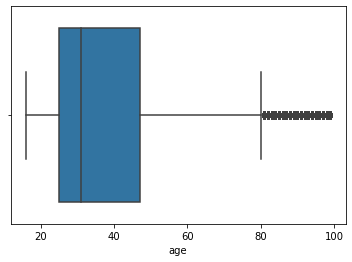

In [50]:
sns.boxplot(x=result['age'])

Label encoder

The customer ids are in the form of alphanumeric values. Coverting it in numerical form for easilt understanding

In [51]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
# result['customer_id'] = x.fit_transform(result['customer_id'])

In [52]:
result

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.030492,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.015237,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.059305,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.042356,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0.043203,1,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0.006763,1,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...


In [53]:
#We have 1362281 unique customers as shown below

In [54]:
len(result['customer_id'].unique())

1362281

In [55]:
#first purchase of each unique customer

In [56]:
first_purchase = result.sort_values(['t_dat']).groupby('customer_id').first()

In [57]:
first_purchase

,t_dat,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
customer_id,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2018-12-27,0.044051,1,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2018-09-21,0.067780,2,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,2018-09-20,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2019-06-09,0.030492,2,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,2018-10-12,0.027102,1,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,2019-04-03,0.050831,2,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,2018-09-25,0.064390,1,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,2018-09-20,0.042356,1,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...


In [58]:
first_purchase['t_dat'].min()

Timestamp('2018-09-20 00:00:00')

In [59]:
first_purchase['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [60]:
#Splitting the time based on before and after

In [61]:
dayss = 90
max_date_total = result['t_dat'].max()
cutoff = max_date_total - pd.to_timedelta(dayss,unit='d')

In [62]:
print(cutoff)
print(max_date_total)

2020-06-24 00:00:00
2020-09-22 00:00:00


In [63]:
data_before = result[result["t_dat"]<=cutoff]

In [64]:
data_after = result[result["t_dat"]>cutoff]

In [65]:
#Descriptive
data_before

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.050831,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.030492,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.015237,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
...,...,...,...,...,...,...,...,...
27982718,2020-06-24,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,0.024390,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982719,2020-06-24,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,0.017610,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982720,2020-06-24,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,0.013542,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...
27982721,2020-06-24,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,0.010831,2,ACTIVE,Regularly,55.0,6cffe743cea040fddb93a098579cf73fd7a137a913850a...


In [66]:
#Target
data_after

,t_dat,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
27982723,2020-06-25,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.025407,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982724,2020-06-25,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.015237,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982725,2020-06-25,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.042356,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982726,2020-06-25,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.030492,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
27982727,2020-06-25,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.025407,1,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.059305,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.042356,2,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0.043203,1,ACTIVE,NONE,67.0,a9c9c4db44316f6e62ea17ba5e8b84c1ec3ebeddb3f299...
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0.006763,1,ACTIVE,Regularly,21.0,3737324e2574c3bde9ef00336bc767781dbed7e828d51a...


# Making target values

In [67]:
target_df = data_after[['customer_id','price']].groupby('customer_id').sum().rename({'price':'spent_90days'},axis=1).assign(Flag_90days=1)

In [68]:
#(0 nnot found)
target_df

,spent_90days,Flag_90days
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.050831,1
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.027102,1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.061000,1
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.128746,1
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.076237,1
...,...,...
ffff12aa623c69eae8959d673f1f12ad0194ad760d77fd489cd7c5a4aa9ae240,0.323559,1
ffff61677073258d461e043cc9ed4ed97be5617a920640ff61024f4619bf41c4,0.066051,1
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0.293017,1


In [69]:
#We need Last days of purchase, first day of purchase, total sales, Number of purchases

In [70]:
#Recency
##How many days have passed since the last purchase

In [71]:
max_date_in = data_before['t_dat'].max()

In [72]:
recency_features_df = data_before[['customer_id','t_dat']].groupby('customer_id').apply(
    lambda x: (x['t_dat'].max() - max_date_in) / pd.to_timedelta(1,"day") *(-1)).to_frame().set_axis(["recency"], axis=1)

In [73]:
recency_features_df

,recency
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,95.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,63.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,67.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,381.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,21.0
...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,4.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,44.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,154.0


# Frequency
# Number of Orders

In [74]:
frequency_features_df = data_before[['customer_id','t_dat']].groupby('customer_id').count().set_axis(
    ['frequency'], axis=1)

In [75]:
frequency_features_df

,frequency
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,20
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,85
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,17
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,9
...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,39
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,76
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,35


# Monertary

In [76]:
price_features_df = data_before.groupby('customer_id').aggregate({"price":["sum","mean"]}).set_axis(
    ['Monertary','price_mean'], axis=1)

In [77]:
price_features_df

,Monertary,price_mean
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.598153,0.029908
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.574831,0.030292
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.643780,0.037869
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983,0.030492
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.340949,0.037883
...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0.999339,0.025624
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,1.702373,0.022400
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,0.646729,0.018478


# Concatnating all the columns, RFM and target values

In [78]:
features_df = pd.concat([recency_features_df, frequency_features_df, price_features_df], axis = 1).merge(target_df,left_index=True,right_index=True,how = "left").fillna(0)

In [79]:
features_df

,recency,frequency,Monertary,price_mean,spent_90days,Flag_90days
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,95.0,20,0.598153,0.029908,0.050831,1.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,63.0,85,2.574831,0.030292,0.027102,1.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,67.0,17,0.643780,0.037869,0.061000,1.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,381.0,2,0.060983,0.030492,0.000000,0.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,21.0,9,0.340949,0.037883,0.128746,1.0
...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,4.0,39,0.999339,0.025624,0.293017,1.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,44.0,76,1.702373,0.022400,0.104949,1.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,154.0,35,0.646729,0.018478,0.142203,1.0


In [80]:
#Conisering the lastest age, sclub_member status, fashion_news.

In [81]:
#For club men=mber Status and fashion news
mm = data_before.sort_values(['t_dat']).groupby('customer_id').last()
#result.sort_values(['t_dat']).groupby('customer_id').first()
#data_before
mm.head()

,t_dat,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code
customer_id,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,2020-03-21,0.011508,2,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2020-04-22,0.016932,2,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,2020-04-18,0.030492,2,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2019-06-09,0.030492,2,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,2020-06-03,0.042356,2,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [82]:
print(mm.shape)

(1291147, 7)


In [83]:
mv = mm[['sales_channel_id','club_member_status','fashion_news_frequency','age']]

In [84]:
features_final = pd.merge(features_df,mv,how="left", on=["customer_id","customer_id"])

In [85]:
features_final

,,recency,frequency,Monertary,price_mean,spent_90days,Flag_90days,sales_channel_id,club_member_status,fashion_news_frequency,age
customer_id,customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,95.0,20,0.598153,0.029908,0.050831,1.0,2,ACTIVE,NONE,49.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,63.0,85,2.574831,0.030292,0.027102,1.0,2,ACTIVE,NONE,25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,67.0,17,0.643780,0.037869,0.061000,1.0,2,ACTIVE,NONE,24.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,381.0,2,0.060983,0.030492,0.000000,0.0,2,ACTIVE,NONE,54.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,21.0,9,0.340949,0.037883,0.128746,1.0,2,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,4.0,39,0.999339,0.025624,0.293017,1.0,2,ACTIVE,NONE,24.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,44.0,76,1.702373,0.022400,0.104949,1.0,1,ACTIVE,NONE,21.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,154.0,35,0.646729,0.018478,0.142203,1.0,1,ACTIVE,Regularly,21.0


In [86]:
features_final.shape

(1291147, 10)

In [87]:
features_final = pd.merge(features_df,mv,how="left", on=["customer_id","customer_id"])

In [88]:
features_final

,,recency,frequency,Monertary,price_mean,spent_90days,Flag_90days,sales_channel_id,club_member_status,fashion_news_frequency,age
customer_id,customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,95.0,20,0.598153,0.029908,0.050831,1.0,2,ACTIVE,NONE,49.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,63.0,85,2.574831,0.030292,0.027102,1.0,2,ACTIVE,NONE,25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,67.0,17,0.643780,0.037869,0.061000,1.0,2,ACTIVE,NONE,24.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,381.0,2,0.060983,0.030492,0.000000,0.0,2,ACTIVE,NONE,54.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,21.0,9,0.340949,0.037883,0.128746,1.0,2,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,4.0,39,0.999339,0.025624,0.293017,1.0,2,ACTIVE,NONE,24.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,44.0,76,1.702373,0.022400,0.104949,1.0,1,ACTIVE,NONE,21.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,154.0,35,0.646729,0.018478,0.142203,1.0,1,ACTIVE,Regularly,21.0


In [89]:
features_final.shape

(1291147, 10)

# EDA

# Basic Histograms

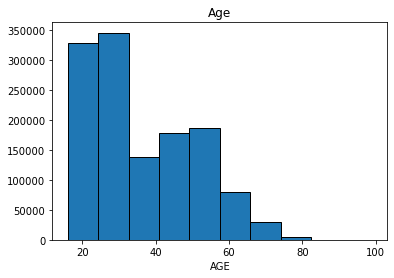

In [90]:
plt.hist(features_final['age'],bins=10,edgecolor='black')
plt.xlabel('AGE')
plt.title('Age')
plt.show()

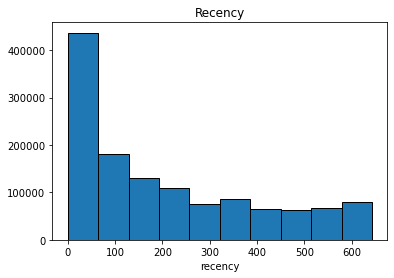

In [91]:
plt.hist(features_final['recency'],bins=10,edgecolor='black')
plt.xlabel('recency')
plt.title('Recency')
plt.show()

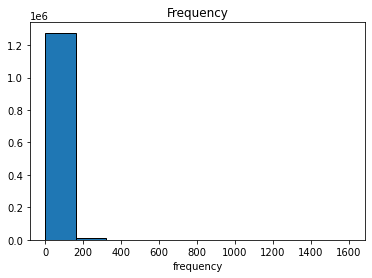

In [92]:
plt.hist(features_final['frequency'],bins=10,edgecolor='black')
plt.xlabel('frequency')
plt.title('Frequency')
plt.show()

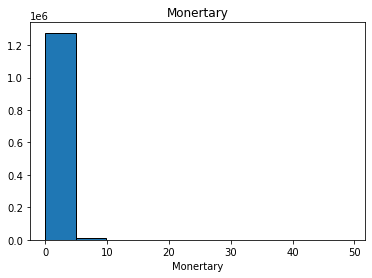

In [93]:
plt.hist(features_final['Monertary'],bins=10,edgecolor='black')
plt.xlabel('Monertary')
plt.title('Monertary')
plt.show()

In [94]:
plt.hist(features_final['price'],bins=10,edgecolor='black')
plt.xlabel('Price')
plt.title('Price')
plt.show()

KeyError: 'price'

# EDA


<AxesSubplot:xlabel='Flag_90days', ylabel='count'>

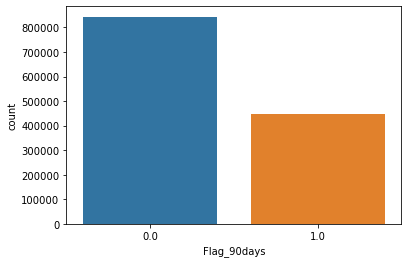

In [95]:
#Here 1 means he bought, 0 means he did not buy anything
sns.countplot(x='Flag_90days',data=features_final)


<AxesSubplot:xlabel='Flag_90days', ylabel='count'>

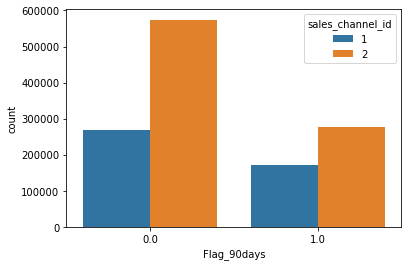

In [96]:
sns.countplot(x="Flag_90days", data=features_final,hue='sales_channel_id')

<AxesSubplot:xlabel='Flag_90days', ylabel='count'>

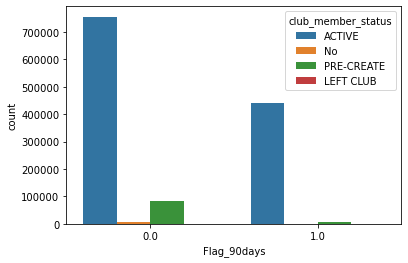

In [97]:
sns.countplot(x="Flag_90days", data=features_final,hue='club_member_status')

<AxesSubplot:xlabel='Flag_90days', ylabel='count'>

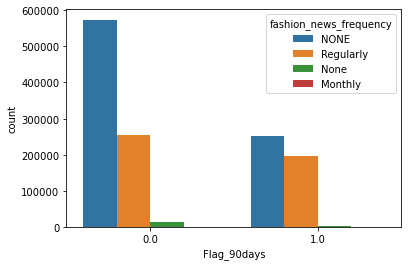

In [98]:
sns.countplot(x="Flag_90days", data=features_final,hue='fashion_news_frequency')

# Outliers

Text(0, 0.5, 'Number if customers')

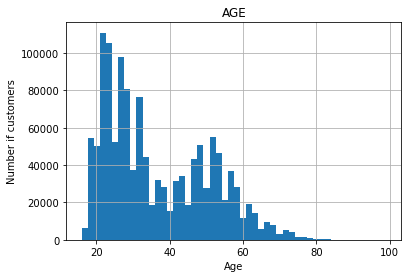

In [99]:
#Normally distributed
figure = features_final.age.hist(bins=50)
figure.set_title('AGE')
figure.set_xlabel('Age')
figure.set_ylabel('Number if customers')

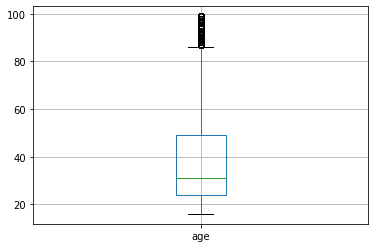

In [100]:
figure = features_final.boxplot(column='age')

Text(0, 0.5, 'Number if customers')

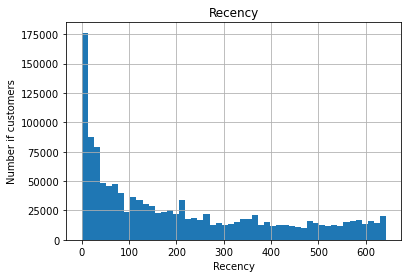

In [101]:
#Normally distributed
figure = features_final.recency.hist(bins=50)
figure.set_title('Recency')
figure.set_xlabel('Recency')
figure.set_ylabel('Number if customers')

Text(0, 0.5, 'Number if customers')

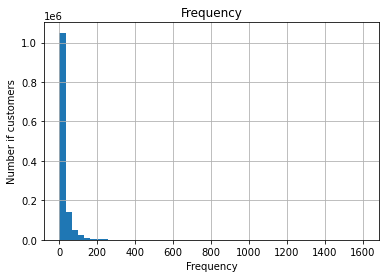

In [102]:
#right skewed distributed
figure = features_final.frequency.hist(bins=50)
figure.set_title('Frequency')
figure.set_xlabel('Frequency')
figure.set_ylabel('Number if customers')

Text(0, 0.5, 'Number if customers')

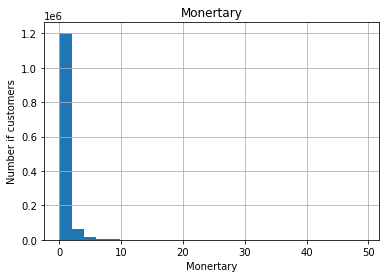

In [103]:
# right skewed distributed
figure = features_final.Monertary.hist(bins=25)
figure.set_title('Monertary')
figure.set_xlabel('Monertary')
figure.set_ylabel('Number if customers')

In [104]:
upper_boundary = features_final['age'].mean() + 3*features_final['age'].std()
lower_boundary = features_final['age'].mean() - 3*features_final['age'].std()
print(lower_boundary)
print(upper_boundary)
print(features_final['age'].mean())

-6.114212309061074
79.03510048058608
36.460444085762504


In [105]:
#IQR
IQR = features_final.age.quantile(0.75)-features_final.age.quantile(0.25)
IQR

25.0

In [106]:
lower_bridge = features_final['age'].quantile(0.25)-(IQR*1.5)
upper_bridge = features_final['age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-13.5
86.5


In [107]:
features_final.loc[features_final['age']>=71,'age']=71

Text(0, 0.5, 'Number if customers')

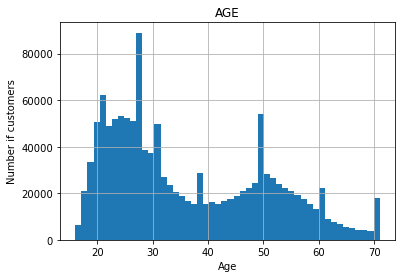

In [108]:
#Normally distributed
figure = features_final.age.hist(bins=50)
figure.set_title('AGE')
figure.set_xlabel('Age')
figure.set_ylabel('Number if customers')

In [109]:
#Skewed distribution

Text(0, 0.5, 'Number if customers')

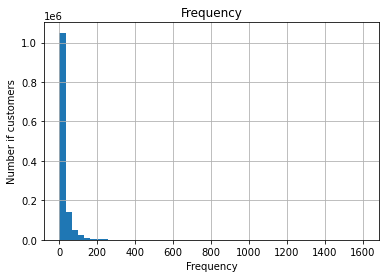

In [110]:
#right skewed distributed
figure = features_final.frequency.hist(bins=50)
figure.set_title('Frequency')
figure.set_xlabel('Frequency')
figure.set_ylabel('Number if customers')

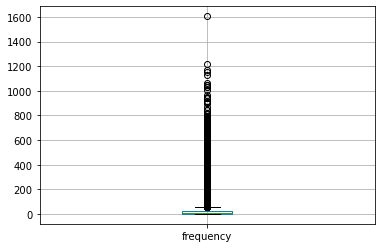

In [111]:
figure = features_final.boxplot(column='frequency')

In [112]:
features_final['frequency'].describe()

count    1.291147e+06
mean     2.167276e+01
std      3.576758e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.500000e+01
max      1.605000e+03
Name: frequency, dtype: float64

In [113]:
lower_bridge = features_final['frequency'].quantile(0.25)-(IQR*3)
upper_bridge = features_final['frequency'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-72.0
100.0


In [114]:
features_final.loc[features_final['frequency']>=79,'frequency']=79

Text(0, 0.5, 'Number if customers')

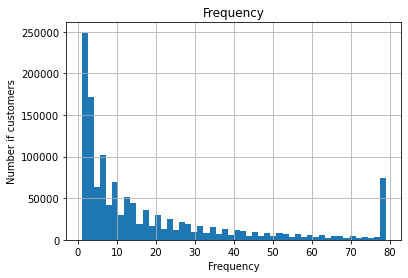

In [115]:
#right skewed distributed
figure = features_final.frequency.hist(bins=50)
figure.set_title('Frequency')
figure.set_xlabel('Frequency')
figure.set_ylabel('Number if customers')

In [116]:
#Monetry outliers

Text(0, 0.5, 'Number if customers')

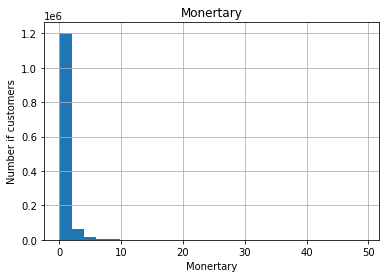

In [117]:
# right skewed distributed
figure = features_final.Monertary.hist(bins=25)
figure.set_title('Monertary')
figure.set_xlabel('Monertary')
figure.set_ylabel('Number if customers')

<AxesSubplot:>

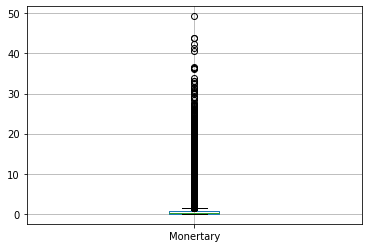

In [118]:
features_final.boxplot(column='Monertary')

In [119]:
lower_bridge = features_final['Monertary'].quantile(0.25)-(IQR*3)
upper_bridge = features_final['Monertary'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-74.91364406779661
75.65728813559322


In [120]:
features_final.loc[features_final['Monertary']>=54,'Monertary']=54

Text(0, 0.5, 'Number if customers')

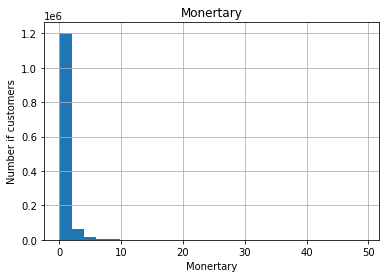

In [121]:
# right skewed distributed
figure = features_final.Monertary.hist(bins=25)
figure.set_title('Monertary')
figure.set_xlabel('Monertary')
figure.set_ylabel('Number if customers')

In [122]:
lower_bridge = features_final['Monertary'].quantile(0.25)-(IQR*3)
upper_bridge = features_final['Monertary'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-74.91364406779661
75.65728813559322


Text(0, 0.5, 'Number if customers')

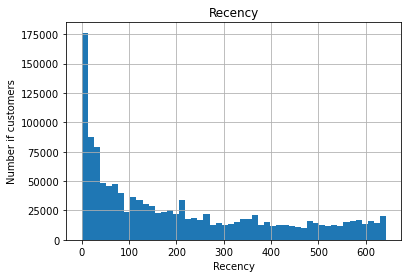

In [123]:
#Normally distributed
figure = features_final.recency.hist(bins=50)
figure.set_title('Recency')
figure.set_xlabel('Recency')
figure.set_ylabel('Number if customers')

<AxesSubplot:>

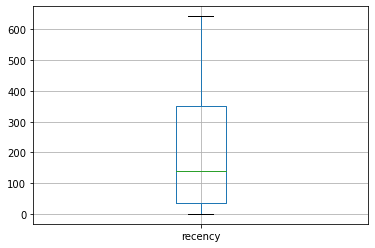

In [124]:
features_final.boxplot(column='recency')

<AxesSubplot:>

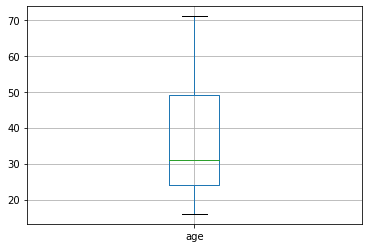

In [187]:
features_final.boxplot(column='age')

In [125]:
lower_boundary = features_final['recency'].quantile(0.25) - (IQR *3)
upper_boundary = features_final['recency'].quantile(0.75) + (IQR *3)
print(lower_bridge)
print(upper_bridge)

-74.91364406779661
75.65728813559322


# Skewness

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

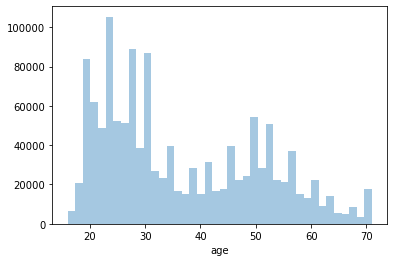

In [126]:
sns.distplot(features_final['age'],kde=False,bins=40)

<AxesSubplot:>

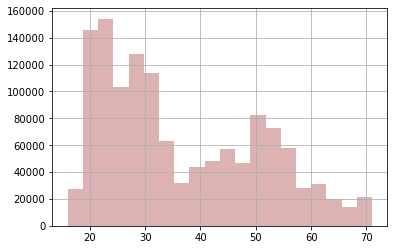

In [127]:
features_final['age'].hist(bins=20,color='darkred',alpha=0.3)

In [ ]:
for i in features_final:
    print(i)
    print(skew(features_final[i]))
    plt.figure()
    sns.displot(features_final[i])
    plt.show()

-0.03228178072466546


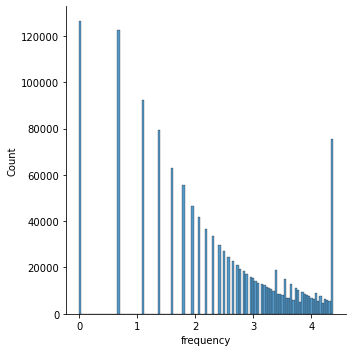

In [188]:
print(skew(features_final['frequency']))
sns.displot(features_final['frequency'])

0.7668875189029577


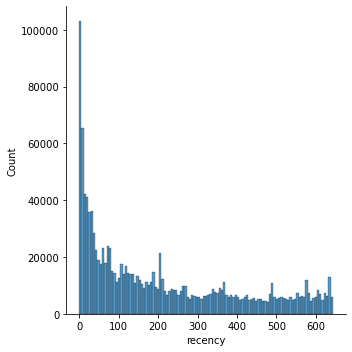

In [129]:
print(skew(features_final['recency']))
sns.displot(features_final['recency'])

6.068802329203337


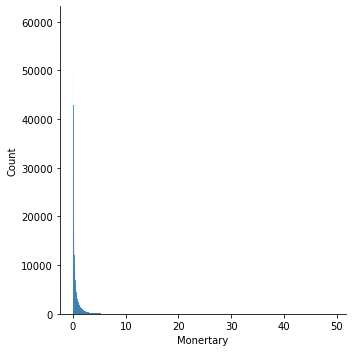

In [130]:
print(skew(features_final['Monertary']))
sns.displot(features_final['Monertary'])

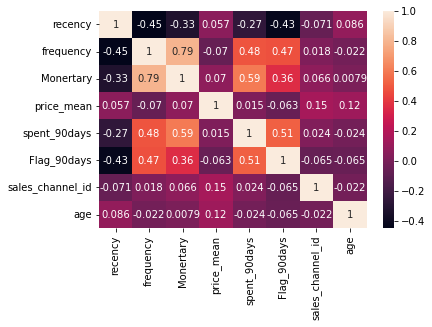

In [131]:
sns.heatmap(features_final.corr(),annot=True)
plt.show()

In [132]:
#Monetry, freq
import numpy as np
features_final["Monertary"] = np.log(features_final["Monertary"])
features_final["frequency"] = np.log(features_final["frequency"])
#features_final["recency"] = np.log(max(features_final["recency"] + 1) - features_final["recency"])

In [133]:
skew(features_final["Monertary"])

0.0854850742731747

In [134]:
skew(features_final["frequency"])

-0.03228178072466546

In [135]:
skew(features_final["recency"])

0.7668875189029577

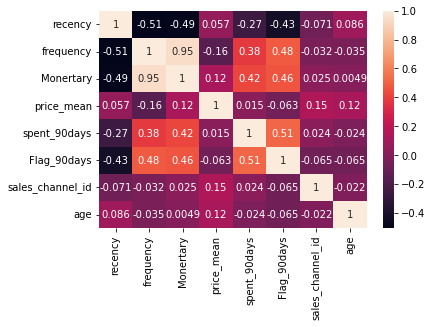

In [136]:
sns.heatmap(features_final.corr(),annot=True)
plt.show()

In [137]:
X = features_final[['recency','frequency','Monertary','price_mean','sales_channel_id','club_member_status','fashion_news_frequency','age']]

In [138]:
X

,,recency,frequency,Monertary,price_mean,sales_channel_id,club_member_status,fashion_news_frequency,age
customer_id,customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,95.0,2.995732,-0.513909,0.029908,2,ACTIVE,NONE,49.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,63.0,4.369448,0.945784,0.030292,2,ACTIVE,NONE,25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,67.0,2.833213,-0.440399,0.037869,2,ACTIVE,NONE,24.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,381.0,0.693147,-2.797159,0.030492,2,ACTIVE,NONE,54.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,21.0,2.197225,-1.076022,0.037883,2,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,4.0,3.663562,-0.000661,0.025624,2,ACTIVE,NONE,24.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,44.0,4.330733,0.532023,0.022400,1,ACTIVE,NONE,21.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,154.0,3.555348,-0.435828,0.018478,1,ACTIVE,Regularly,21.0


In [139]:
Y_class = features_final[['Flag_90days']]

In [140]:
Y_reg = features_final[['spent_90days']]

# Categorical encoding on the features

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [4,5,6])], remainder = 'passthrough')
XX = ct.fit_transform(X)
                        
# lt = LabelEncoder()
# features_final.sales_channel_id = lt.fit_transform(features_final.sales_channel_id)
# features_final.club_member_status = lt.fit_transform(features_final.club_member_status)
# features_final.fashion_news_frequency = lt.fit_transform(features_final.fashion_news_frequency)

                                       

In [142]:
XX.shape

(1291147, 15)

# SMOTE

In [143]:
oversample = SMOTE()
XX,Y_class=oversample.fit_resample(XX,Y_class)

In [147]:
sns.countplot(x=Y_class)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [146]:
Y_class.shape

(1686722, 1)

In [ ]:
#Correlation

In [ ]:
r = features_final.corr()
sns.heatmap(r,vmax=.8,square=True)

In [ ]:
#Normalization

In [ ]:
#Abt
#Norm
          #Age
          #correlatio
          #art
        #mode sales 
       #age sepearate
          #article ID, FN, Active remove
#yes and nO using Active(based on lastest)
          #Data quality value
         #Sales channel mode

##ML (removed classify thib=ng look into it)

In [ ]:
features_final

# Train Test split

In [ ]:
yuyu = features_final[['recency','frequency','Monertary','price_mean','sales_channel_id','club_member_status','fashion_news_frequency','age']]

In [ ]:
#XX = features_finall.drop(columns=[14,15], inplace=True)
#YY = features_finall[15]
# YY = features_final[['Flag_90days']]

In [ ]:
#XX = features_final[['recency','frequency','Monertary','price_mean','age','sales_channel_id']]
#XX = features_finall[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,16]]
# XX = features_final[['recency','frequency','Monertary','price_mean','sales_channel_id','club_member_status','fashion_news_frequency','age']]

In [148]:
XX.shape

(1686722, 15)

In [149]:
Y_class.shape

(1686722, 1)

In [150]:
Y_reg.shape

(1291147, 1)

In [151]:
from sklearn.preprocessing import LabelEncoder
xx = LabelEncoder()
Y_class = xx.fit_transform(Y_class)

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
Y_class

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
from sklearn.model_selection import train_test_split
X_trainn,X_testt, Y_trainn, Y_testt = train_test_split(XX,Y_class,test_size=0.1,random_state=42)

In [154]:
X_trainn.shape

(1518049, 15)

In [155]:
Y_trainn.shape

(1518049,)

# Logistic regression

In [156]:
LR =LogisticRegression()
LR.fit(X_trainn,Y_trainn)

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
y_pred_LR = LR.predict(X_testt)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_LR,Y_testt)

0.7594339342989097

In [159]:
from sklearn.metrics import classification_report
print(classification_report(Y_testt,y_pred_LR))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     84174
           1       0.74      0.79      0.77     84499

    accuracy                           0.76    168673
   macro avg       0.76      0.76      0.76    168673
weighted avg       0.76      0.76      0.76    168673



## Random Forest Classifier

In [160]:

model1 = RandomForestClassifier()
model1.fit(X_trainn,Y_trainn)


RandomForestClassifier()

In [161]:
wdy_pred = model1.predict(X_testt)

In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(wdy_pred,Y_testt)

0.8088965038862177

In [163]:
from sklearn.metrics import classification_report
print(classification_report(Y_testt,wdy_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     84174
           1       0.80      0.82      0.81     84499

    accuracy                           0.81    168673
   macro avg       0.81      0.81      0.81    168673
weighted avg       0.81      0.81      0.81    168673



In [ ]:
# bootstrap= True, criterion= 'entropy', max_depth= 5, 
#                                   max_features= 2, min_samples_leaf= 1, n_estimators = 300


In [201]:
accuracy_score(Y_trainn,model1.predict(X_trainn))

0.996572574403066

In [207]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(7, 10)) }]

clf = GridSearchCV(rfc, forest_params, cv = 2, scoring='accuracy', verbose=3)


In [208]:
clf.fit(X_trainn, Y_trainn)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .......................max_depth=7;, score=0.767 total time=  42.4s
[CV 2/2] END .......................max_depth=7;, score=0.767 total time=  41.3s
[CV 1/2] END .......................max_depth=8;, score=0.770 total time=  46.7s
[CV 2/2] END .......................max_depth=8;, score=0.770 total time=  45.9s
[CV 1/2] END .......................max_depth=9;, score=0.774 total time=  48.9s
[CV 2/2] END .......................max_depth=9;, score=0.772 total time=  48.3s


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 8, 9]}], scoring='accuracy',
             verbose=3)

In [209]:
clf.best_estimator_

RandomForestClassifier(max_depth=9)

In [165]:
rfc_f = RandomForestClassifier(max_depth=50)
rfc_f.fit(X_trainn,Y_trainn)
y_pred = rfc_f.predict(X_testt)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_testt)

0.8091455063940287

In [167]:
print(classification_report(Y_testt,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     84174
           1       0.80      0.82      0.81     84499

    accuracy                           0.81    168673
   macro avg       0.81      0.81      0.81    168673
weighted avg       0.81      0.81      0.81    168673



In [245]:
accuracy_score(Y_trainn, rfc_f.predict(X_trainn))

0.9965646695198903

In [ ]:
y_pred = clf.predict(X_testt)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_testt)

# XGB

In [182]:
xgb_normal = XGBClassifier()
xgb_normal.fit(X_trainn,Y_trainn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [184]:
Y_pred_norm = xgb_normal.predict(X_testt)

In [185]:
accuracy_score(Y_pred_norm,Y_testt)

0.821257699809691

In [186]:
print(classification_report(Y_pred_norm,Y_testt))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     87929
           1       0.80      0.84      0.82     80744

    accuracy                           0.82    168673
   macro avg       0.82      0.82      0.82    168673
weighted avg       0.82      0.82      0.82    168673



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=2,
                   subsample=1,
                   n_estimators=100,
                   learning_rate=0.1)
xgb.fit(X_trainn,Y_trainn)


In [ ]:
y_prediction = xgb.predict(X_testt)

In [ ]:
accuracy_score(y_prediction,Y_testt)

In [ ]:
accuracy_score(Y_trainn, xgb.predict(X_trainn))

In [ ]:
#Underfitting above

In [ ]:
clf_xgb = XGBClassifier(objective='binary:logistic', missing=None,seed=42)
clf_xgb.fit(X_trainn,Y_trainn,verbose=True,early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_testt,Y_testt)])

In [ ]:
y_pred = clf_xgb.predict(X_testt)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_pred,Y_testt)

In [ ]:
Y_testt

In [ ]:
######
param_grid = {'max_depth':[4],
             'learning_rate': [0.1,0.5,1],
             'gamma': [0.25],
             'reg_lambda': [10.0,20,100],
             'scale_pos_weight': [3]}

In [ ]:
optimal_params = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs=10,
                              cv=3)

In [172]:
from xgboost import XGBClassifier

In [173]:
xgb = XGBClassifier()

random_grid = {'max_depth':[3,4,5,10,15,20],
               'learning_rate':[0.1,0.01,0.5],
               'gamma': [0,0.25,1.0],
               'reg_lambda':[0,1.0,10.0,15],
               'scale_pos_weight':[1,3,5,10,13]}
print(random_grid)

{'max_depth': [3, 4, 5, 10, 15, 20], 'learning_rate': [0.1, 0.01, 0.5], 'gamma': [0, 0.25, 1.0], 'reg_lambda': [0, 1.0, 10.0, 15], 'scale_pos_weight': [1, 3, 5, 10, 13]}


In [216]:
xgf_randomized = RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
xgf_randomized.fit(X_trainn,Y_trainn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END gamma=1.0, learning_rate=0.1, max_depth=10, reg_lambda=10.0, scale_pos_weight=5; total time= 6.3min
[CV] END gamma=0, learning_rate=0.5, max_depth=20, reg_lambda=10.0, scale_pos_weight=1; total time=13.5min
[CV] END gamma=0, learning_rate=0.1, max_depth=10, reg_lambda=15, scale_pos_weight=13; total time= 6.3min
[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=10.0, scale_pos_weight=10; total time= 2.9min
[CV] END gamma=1.0, learning_rate=0.1, max_depth=15, reg_lambda=0, scale_pos_weight=5; total time=10.8min


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [217]:
xgf_randomized.best_params_

{'scale_pos_weight': 1,
 'reg_lambda': 0,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 0}

In [218]:
xgf_randomized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [175]:
XG_hyper = XGBClassifier(scale_pos_weight = 1,reg_lambda = 0,max_depth = 5,learning_rate = 0.5,gamma = 0)

In [176]:
XG_hyper.fit(X_trainn,Y_trainn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [178]:
y_pred_hyper_xg = XG_hyper.predict(X_testt)

In [179]:
accuracy_score(y_pred_hyper_xg,Y_testt)

0.8217794193498663

In [180]:
print(classification_report(y_pred_hyper_xg,Y_testt))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     88261
           1       0.80      0.84      0.82     80412

    accuracy                           0.82    168673
   macro avg       0.82      0.82      0.82    168673
weighted avg       0.82      0.82      0.82    168673



In [219]:
best_gridd = xgf_randomized.best_estimator_

In [220]:
y_preddd = best_gridd.predict(X_testt)

In [221]:
y_preddd.shape

(168673,)

In [222]:
X_testt.shape

(168673, 15)

In [223]:
accuracy_score(y_preddd,Y_testt)

0.8184060282321415

In [225]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_testt,y_preddd)
cm

array([[70875, 13299],
       [17331, 67168]])

In [ ]:
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# print("Accuracy",accuracy_score(Y_testt,y_pr))
# print("Precesion: %.3f" %precision_score(Y_testt,y_pr))
# print("Recall: %.3f" %recall_score(Y_testt,y_pr))
# print("F1-score: %.3f" %f1_score(Y_testt,y_pr))

# Stochastic Gradient Descent


In [168]:
Sgd_class = SGDClassifier()
Sgd_class.fit(X_trainn,Y_trainn)

SGDClassifier()

In [169]:
y_pred_sgd = Sgd_class.predict(X_testt)

In [170]:
accuracy_score(y_pred_sgd,Y_testt)

0.7408417470490238

In [171]:
print(classification_report(Y_testt,y_pred_sgd))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     84174
           1       0.80      0.64      0.71     84499

    accuracy                           0.74    168673
   macro avg       0.75      0.74      0.74    168673
weighted avg       0.75      0.74      0.74    168673



# Classification AUC 

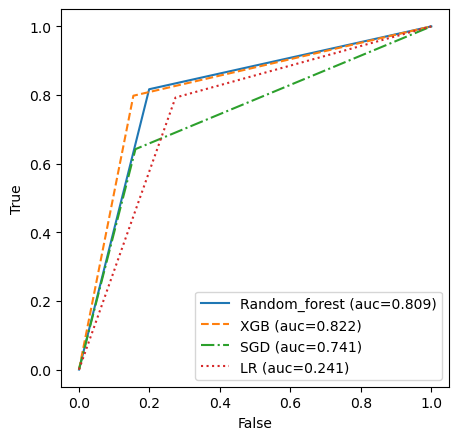

In [181]:

from sklearn.metrics import roc_curve, auc
random_fpr,random_tpr,threshold = roc_curve(Y_testt,wdy_pred)
auc_random = auc(random_fpr,random_tpr)

xg_fpr,xg_tpr,threshold = roc_curve(Y_testt,y_pred_hyper_xg)
auc_xg = auc(xg_fpr,xg_tpr)


sgd_fpr,sgd_tpr,threshold = roc_curve(Y_testt,y_pred_sgd)
auc_sgd = auc(sgd_fpr,sgd_tpr)

lr_fpr,lr_tpr,threshold= roc_curve(Y_testt,y_pred_LR)
auc_lr = auc(lr_tpr,lr_fpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(random_fpr,random_tpr,linestyle='-',label='Random_forest (auc=%0.3f)' % auc_random)
plt.plot(xg_fpr,xg_tpr,linestyle='--',label='XGB (auc=%0.3f)' % auc_xg)
plt.plot(sgd_fpr,sgd_tpr,linestyle='-.',label='SGD (auc=%0.3f)' % auc_sgd)
plt.plot(lr_fpr,lr_tpr,linestyle=':',label='LR (auc=%0.3f)' % auc_lr)

plt.xlabel('False')
plt.ylabel('True')

plt.legend()
plt.show()



# Clustering

In [ ]:
pip install plotly

In [ ]:

import plotly.express as px
fig = px.scatter_matrix(XX,
width=1200, height=1600)
fig.show()

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
scaler = MinMaxScaler()
scaler.fit(XX)
XX=scaler.transform(XX)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(XX)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
km

In [ ]:
y_pre = km.fit_predict(XX)

In [ ]:
y_pre

In [ ]:
XY = pd.DataFrame(XX,columns=['recency','frequency','Monertary','price_mean','sales_channel_id','club_member_status','fashion_news_frequency','age'])

In [ ]:
XY['cluster'] = y_pre

In [ ]:
XY

In [ ]:
XY.head()

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca_num_components = 2
reduced_data = PCA(n_components = pca_num_components).fit_transform(XY)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


In [ ]:
import seaborn as sns
sns.scatterplot(x="pca1",y="pca2",hue=XY['cluster'],data=results)
plt.title('K-means for 2 dimension using PCA')
plt.show()

# Regression

In [251]:
YY_reg = features_final[['spent_90days']]

In [255]:
YY_reg.shape

(1291147, 1)

In [257]:
from sklearn.model_selection import train_test_split
X_trainnn,X_testtt, Y_trainnn, Y_testtt = train_test_split(X,YY_reg,test_size=0.1,random_state=42)

In [258]:
from xgboost import XGBRegressor

xg_regg =  XGBRegressor(objective="reg:squarederror", random_state=123)


In [259]:
xgb_regg_model = GridSearchCV(estimator=xg_regg,param_grid=dict(learning_rate = [0.01,0.1,0.3,0.5]),
                                                               scoring = 'neg_mean_absolute_error',
                                                               refit = True,
                                                               cv = 2)

In [262]:
xgb_regg_model.fit(X_trainnn,Y_trainnn)

/Users/rohith/opt/anaconda3/envs/vaibhav/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rohith/opt/anaconda3/envs/vaibhav/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rohith/opt/anaconda3/envs/vaibhav/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/rohith/opt/anaconda3/envs/vaibhav/lib/python3.7/site-packages/xgboost/sklearn.py", line 946, in fit
    ena

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:club_member_status, fashion_news_frequency

In [ ]:
xgb_regg_model.best_score_

In [ ]:
y_pred_xgreg = xgb_regg_model.predict(X_testtt)

In [261]:
from sklearn.metrics import r2_score
r2_score(y_pred_xgreg,Y_testtt)

NameError: name 'y_pred_xgreg' is not defined